In [229]:
import torch
import numpy
from IPython.display import clear_output
from tqdm import tqdm

In [230]:
theta1 = 0.01
theta2 = 0.5
theta3 = 1
theta4 = 0.01


[94.8041958041958,
 45.04195804195804,
 8.315353466721877,
 7.455511805261812,
 0.9868986031288247,
 0.952735796188351,
 0.9807684510589002,
 0.9349333907802237]

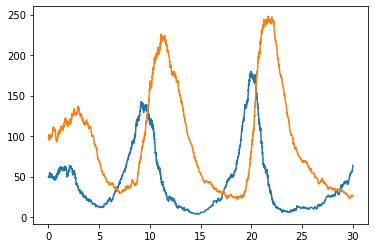

In [231]:
class LotkaVoltera:
    def __init__(self,initial_state, params): 
        self.initial_state = initial_state
        self.predator = [initial_state[0]]
        self.prey = [initial_state[1]]
        self.params = params
    def simulate_steps(self, number_steps):
        state = self.initial_state
        t = 0
        self.time = [t]
        for i in range(number_steps):
            x = state[0]
            y = state[1]
            xy = x*y
            
            rates = torch.tensor([xy,x,y,xy])*self.params

            t += torch.distributions.Exponential(torch.sum(rates)).sample().item()
            self.time.append(t)
            reaction = torch.distributions.Categorical(rates/torch.sum(rates)).sample().item()
            
            if reaction == 0:
                state[0] += 1
            elif reaction == 1:
                state[0] -= 1
            elif reaction == 2:
                state[1] += 1
            elif reaction == 3:
                state[1] -= 1
            self.predator.append(state[0])
            self.prey.append(state[1])
            if state[0]*state[1] == 0:
                break
        return self.time,self.predator, self.prey
    
    def simulate_time(self, max_time):
        state = self.initial_state
        t=0
        self.time = [t]
        while t<max_time:
            x = state[0]
            y = state[1]
            xy = x*y
            
            rates = torch.tensor([xy,x,y,xy])*self.params
            if torch.sum(rates) == 0:
                break

            t += torch.distributions.Exponential(torch.sum(rates)).sample().item()
            self.time.append(t)
            reaction = torch.distributions.Categorical(rates/torch.sum(rates)).sample().item()
            
            if reaction == 0:
                state[0] += 1
            elif reaction == 1:
                state[0] -= 1
            elif reaction == 2:
                state[1] += 1
            elif reaction == 3:
                state[1] -= 1
            self.predator.append(state[0])
            self.prey.append(state[1])
        return self.time,self.predator, self.prey
    
    def compute_statistics(self,time,predator,prey):
        sampled_predator, sampled_prey = numpy.array(sample_signal(0.2,time, predator)), numpy.array(sample_signal(0.2,time, prey))
        mean_predator, mean_prey = sampled_predator.mean(),sampled_prey.mean()
        log_var_predator, log_var_prey = numpy.log(sampled_predator.var()), numpy.log(sampled_prey.var())
        autocorrelation_predator_lag_1,autocorrelation_predator_lag_2 = acf(sampled_predator, length = 3)[1:]
        autocorrelation_prey_lag_1,autocorrelation_prey_lag_2 = acf(sampled_prey, length = 3)[1:]
        cross_correlation = numpy.correlate(sampled_prey, sampled_predator)
        return [mean_predator,mean_prey,log_var_predator, log_var_prey,autocorrelation_predator_lag_1,autocorrelation_predator_lag_2,autocorrelation_prey_lag_1,autocorrelation_prey_lag_2]
            
LK = LotkaVoltera([100,50], torch.tensor([theta1, theta2, theta3, theta4]))  
time, predator,prey = LK.simulate_time(30)
plt.plot(time, prey)
plt.plot(time, predator)
LK.compute_statistics(time, predator,prey)

In [233]:
n_D = 100
D_theta = []
D_x = []
for t in tqdm(range(n_D)):
    params = torch.exp(torch.distributions.Uniform(-5,2).sample([4]))
    D_theta.append(params)
    LK = LotkaVoltera([100,50], params) 
    time, predator,prey = LK.simulate_time(30)
    '''plt.plot(time, predator)
    plt.plot(time, prey)
    plt.show()'''
    D_x.append(torch.tensor(LK.compute_statistics(time, predator, prey)))
    '''sampled_predator, sampled_prey = sample_signal(0.2, time, predator),sample_signal(0.2, time, prey) 
    plt.plot(sampled_predator)
    plt.plot(sampled_prey)
    plt.show()'''
D_theta = torch.stack(D_theta, dim =0)
D_x = torch.stack(D_x, dim =0)

 42%|██████████████████████████████████████████████████████████████▏                                                                                     | 42/100 [03:17<04:32,  4.71s/it]


KeyboardInterrupt: 

In [196]:
print(D_theta.shape)
print(D_x.shape)

torch.Size([20, 4])
torch.Size([20, 8])


In [186]:
def acf(x, length=3 ):
    return numpy.array([1]+[numpy.corrcoef(x[:-i], x[i:])[0,1]  \
        for i in range(1, length)])

def sample_signal(dt,time, signal):
    sampled_signal = [signal[0]]
    t=0
    i=1
    while i<len(signal):
        t+=time[i]-time[i-1]
        if t>dt:
            t=0
            sampled_signal.append(signal[i-1])
        i +=1
    return sampled_signal
sampled_signal = sample_signal(0.2, time,prey)
print(sampled_signal)

[50, 57, 56, 51, 44, 34, 31, 33, 31, 35, 37, 43, 44, 46, 51, 64, 60, 51, 55, 71, 72, 73, 75, 78, 82, 81, 72, 67, 64, 56, 59, 61, 60, 68, 61, 66, 56, 53, 49, 44, 40, 36, 36, 36, 39, 37, 39, 32, 35, 32, 34, 30, 22, 29, 30, 24, 20, 19, 17, 22, 24, 24, 28, 33, 34, 38, 45, 47, 48, 55, 62, 69, 73, 81, 93, 107, 116, 119, 121, 123, 112, 102, 85, 76, 63, 50, 44, 36, 25, 21, 21, 18, 17, 13, 14, 13, 9, 11, 11, 12, 12, 11, 20, 23, 23, 27, 28, 27, 28, 33, 39, 37, 42, 48, 58, 67, 66, 72, 82, 93, 108, 123, 127, 147, 162, 165, 151, 146, 114, 85, 74, 50, 39, 36, 21, 14, 11, 9, 8, 7, 6, 3, 4, 3, 2, 1]


In [120]:
from __future__ import division
import numpy as np
import numpy.random as rng


class SimTooLongException(Exception):

    def __init__(self, max_n_steps):
        self.max_n_steps = max_n_steps

    def __str__(self):
        return 'Simulation exceeded the maximum of {} steps.'.format(self.max_n_steps)


class MarkovJumpProcess:
    """Implements a generic markov jump process and algorithms for simulating it.
    It is an abstract class, it needs to be inherited by a concrete implementation."""

    def __init__(self, init, params):

        self.state = np.asarray(init)
        self.params = np.asarray(params)
        self.time = 0.0

    def _calc_propensities(self):
        raise NotImplementedError('This is an abstract method and should be implemented in a subclass.')

    def _do_reaction(self, reaction):
        raise NotImplementedError('This is an abstract method and should be implemented in a subclass.')

    def sim_steps(self, num_steps):
        """Simulates the process with the gillespie algorithm for a specified number of steps."""

        times = [self.time]
        states = [self.state.copy()]

        for _ in range(num_steps):

            rates = self.params * self._calc_propensities()
            total_rate = rates.sum()

            if total_rate == 0:
                self.time = float('inf')
                break

            self.time += rng.exponential(scale=1/total_rate)

            reaction = torch.distributions.Categorical(torch.tensor(rates)/ total_rate).sample()
            print(reaction)
            self._do_reaction(reaction)

            times.append(self.time)
            states.append(self.state.copy())

        return times, np.array(states)

    def sim_time(self, dt, duration, max_n_steps=float('inf')):
        """Simulates the process with the gillespie algorithm for a specified time duration."""

        num_rec = int(duration / dt) + 1
        states = np.zeros([num_rec, self.state.size])
        cur_time = self.time
        n_steps = 0

        for i in range(num_rec):

            while cur_time > self.time:

                rates = self.params * self._calc_propensities()
                total_rate = rates.sum()

                if total_rate == 0:
                    self.time = float('inf')
                    break

                self.time += rng.exponential(scale=1/total_rate)
    
                reaction = torch.distributions.Categorical(torch.tensor(rates)/ total_rate).sample()
                self._do_reaction(reaction)

                n_steps += 1
                if n_steps > max_n_steps:
                    raise SimTooLongException(max_n_steps)

            states[i] = self.state.copy()
            cur_time += dt

        return np.array(states)


class LotkaVolterra(MarkovJumpProcess):
    """Implements the lotka-volterra population model."""

    def _calc_propensities(self):

        x, y = self.state
        xy = x * y
        return np.array([xy, x, y, xy])

    def _do_reaction(self, reaction):

        if reaction == 0:
            self.state[0] += 1
        elif reaction == 1:
            self.state[0] -= 1
        elif reaction == 2:
            self.state[1] += 1
        elif reaction == 3:
            self.state[1] -= 1
        else:
            raise ValueError('Unknown reaction.')

In [121]:
lk = LotkaVolterra(torch.tensor([100,50]),torch.tensor([theta1,theta2,theta3,theta4]))

In [122]:
states = lk.sim_time(0.2,30)

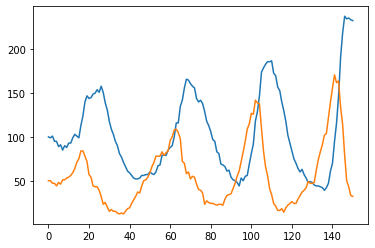

In [123]:
import matplotlib.pyplot as plt
plt.plot(states)

In [34]:
print(torch.tensor(states).shape)

torch.Size([10001, 2])


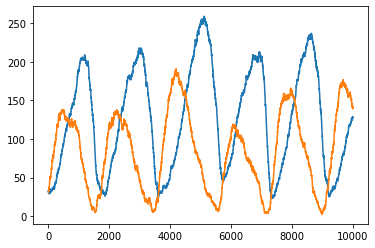

In [35]:
plt.plot(torch.tensor(states)[:,0].numpy())
plt.plot(torch.tensor(states)[:,1].numpy())